In [2]:

import os
import pandas as pd
from sklearn.model_selection import train_test_split
import ast

# Define the full feature set for multi-label classification
features = ['dry_skin', 'oily_skin', 'eye_bags', 'puffy_cheeks', 'tanned_skin', 'wrinkles', 'dark_spots', 'acne', 'redness']

# Function to create a default label dictionary (all 0s unless specified)
def default_labels(positive_features=None):
    labels = {f: 0 for f in features}
    if positive_features:
        for feature in positive_features:
            labels[feature] = 1
    return labels

# Initialize an empty DataFrame to hold all image paths and labels
combined_df = pd.DataFrame(columns=['image_path', 'labels'])

# ### Dataset 1: Oily-Dry-and-Normal-Skin-Types-Dataset (dry and oily skin)
skin_type_base_path = '/kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types'
splits = ['train', 'test', 'valid']  # Include all splits
for split in splits:
    split_path = os.path.join(skin_type_base_path, split)
    if os.path.exists(split_path):
        for cls in ['dry', 'oily']:  # Only process 'dry' and 'oily', ignoring 'normal' for now
            cls_path = os.path.join(split_path, cls)
            if os.path.exists(cls_path):
                image_paths = [os.path.join(cls_path, img) for img in os.listdir(cls_path) if img.endswith('.jpg')]
                existing_image_paths = [path for path in image_paths if os.path.exists(path)]
                print(f"Found {len(existing_image_paths)} images for {cls} skin in {split} at {cls_path}")
                labels = [default_labels(['dry_skin' if cls == 'dry' else 'oily_skin']) for _ in existing_image_paths]
                temp_df = pd.DataFrame({'image_path': existing_image_paths, 'labels': labels})
                combined_df = pd.concat([combined_df, temp_df], ignore_index=True)
            else:
                print(f"Directory not found: {cls_path}")
    else:
        print(f"Split directory not found: {split_path}")
        if os.path.exists(skin_type_base_path):
            print(f"Contents of {skin_type_base_path}: {os.listdir(skin_type_base_path)}")

# ### Dataset 2: Skin Defects (acne, redness, eye bags)
defects_path = '/kaggle/input/skin-defects-acne-redness-and-bags-under-the-eyes'
defects_csv_path = os.path.join(defects_path, 'skin_defects.csv')
if os.path.exists(defects_csv_path):
    defects_csv = pd.read_csv(defects_csv_path)
    
    # Debugging: Print CSV column names and sample rows
    print("\nColumn names in skin_defects.csv:")
    print(defects_csv.columns.tolist())
    print("\nFirst 5 rows of skin_defects.csv:")
    print(defects_csv.head())
    
    # Debugging: List directory contents
    print("\nContents of defects_path:")
    print(os.listdir(defects_path))
    files_dir = os.path.join(defects_path, 'files')
    if os.path.exists(files_dir):
        print(f"\nContents of {files_dir}:")
        print(os.listdir(files_dir))
    
    # Define view columns
    view_columns = ['front', 'left_side', 'right_side']
    if not all(col in defects_csv.columns for col in view_columns):
        print(f"\nError: Missing expected columns {view_columns} in defects_csv")
    else:
        defects_df = pd.DataFrame(columns=['image_path', 'labels'])
        for idx, row in defects_csv.iterrows():
            defect_type = row['type']
            feature_map = {'acne': 'acne', 'redness': 'redness', 'bags': 'eye_bags'}
            positive_features = [feature_map.get(defect_type, defect_type)]
            labels = default_labels(positive_features)
            print(f"\nProcessing row {idx} with type: {defect_type}")
            for view in view_columns:
                relative_path = row[view].strip().lstrip('/')
                image_path = os.path.join(defects_path, 'files', relative_path)
                print(f"Relative path from CSV: {relative_path}")
                print(f"Constructed image_path: {image_path}")
                if os.path.exists(image_path):
                    print(f"File exists: {image_path}")
                    defects_df = pd.concat([defects_df, pd.DataFrame([{'image_path': image_path, 'labels': labels}])], ignore_index=True)
                else:
                    print(f"File does not exist - skipping: {image_path}")
        combined_df = pd.concat([combined_df, defects_df], ignore_index=True)
        print(f"Found {len(defects_df)} valid images for skin defects")
else:
    print(f"CSV file not found: {defects_csv_path}")

# ### Dataset 3: Skin Tone Classification (tanned skin using 'dark brown')
tanned_path = '/kaggle/input/skin-tone-classification/skin tone classification data/dark brown'
if os.path.exists(tanned_path):
    image_paths = [os.path.join(tanned_path, img) for img in os.listdir(tanned_path) if img.endswith('.jpg')]
    existing_image_paths = [path for path in image_paths if os.path.exists(path)]
    print(f"Found {len(existing_image_paths)} images for tanned skin at {tanned_path}")
    labels = [default_labels(['tanned_skin']) for _ in existing_image_paths]
    tanned_df = pd.DataFrame({'image_path': existing_image_paths, 'labels': labels})
    combined_df = pd.concat([combined_df, tanned_df], ignore_index=True)
else:
    print(f"Directory not found: {tanned_path}")
    if os.path.exists('/kaggle/input/skin-tone-classification'):
        print(f"Contents of /kaggle/input/skin-tone-classification: {os.listdir('/kaggle/input/skin-tone-classification')}")

# ### Dataset 4: Skin Cancer MNIST HAM10000 (dark spots)
dark_spots_path = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1'
if os.path.exists(dark_spots_path):
    image_paths = [os.path.join(dark_spots_path, img) for img in os.listdir(dark_spots_path) if img.endswith('.jpg')]
    existing_image_paths = [path for path in image_paths if os.path.exists(path)]
    print(f"Found {len(existing_image_paths)} images for dark spots at {dark_spots_path}")
    labels = [default_labels(['dark_spots']) for _ in existing_image_paths]
    dark_spots_df = pd.DataFrame({'image_path': existing_image_paths, 'labels': labels})
    combined_df = pd.concat([combined_df, dark_spots_df], ignore_index=True)
else:
    print(f"Directory not found: {dark_spots_path}")
    if os.path.exists('/kaggle/input/skin-cancer-mnist-ham10000'):
        print(f"Contents of /kaggle/input/skin-cancer-mnist-ham10000: {os.listdir('/kaggle/input/skin-cancer-mnist-ham10000')}")

# ### Dataset 5: Skin Wrinkles vs Non-Wrinkles (wrinkles)
wrinkles_path = '/kaggle/input/skin-wrinkles-vs-nonwrinkles/SkinDatasets/datasets/train/Wrinkled'
if os.path.exists(wrinkles_path):
    image_paths = [os.path.join(wrinkles_path, img) for img in os.listdir(wrinkles_path) if img.endswith('.jpg')]
    existing_image_paths = [path for path in image_paths if os.path.exists(path)]
    print(f"Found {len(existing_image_paths)} images for wrinkles at {wrinkles_path}")
    labels = [default_labels(['wrinkles']) for _ in existing_image_paths]
    wrinkles_df = pd.DataFrame({'image_path': existing_image_paths, 'labels': labels})
    combined_df = pd.concat([combined_df, wrinkles_df], ignore_index=True)
else:
    print(f"Directory not found: {wrinkles_path}")
    if os.path.exists('/kaggle/input/skin-wrinkles-vs-nonwrinkles'):
        print(f"Contents of /kaggle/input/skin-wrinkles-vs-nonwrinkles: {os.listdir('/kaggle/input/skin-wrinkles-vs-nonwrinkles')}")

# Final check of combined_df
print(f"\nTotal images in combined_df: {len(combined_df)}")
if len(combined_df) > 0:
    print("Sample image paths in combined_df:")
    print(combined_df['image_path'].head())

# Split the dataset into training and test sets (80% train, 20% test)
train_df, test_df = train_test_split(combined_df, test_size=0.2, random_state=42)

# Save to CSV files in Kaggle's writable directory
train_df.to_csv('/kaggle/working/train_dataset.csv', index=False)
test_df.to_csv('/kaggle/working/test_dataset.csv', index=False)

print("Training set size:", len(train_df))
print("Test set size:", len(test_df))



Found 652 images for dry skin in train at /kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/train/dry
Found 1000 images for oily skin in train at /kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/train/oily
Found 35 images for dry skin in test at /kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/test/dry
Found 40 images for oily skin in test at /kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/test/oily
Found 71 images for dry skin in valid at /kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/valid/dry
Found 80 images for oily skin in valid at /kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/valid/oily

Column names in skin_defects.csv:
['id', 'front', 'left_side', 'right_side', 'type']

First 5 rows of skin_defects.csv:
   id              front              left_side              right_side  type
0   0  /acne/0/front.jpg  /acne/0/left_side.jpg  /ac


Checking training dataset files:
All files in train_df exist.

Checking test dataset files:
All files in test_df exist.

Testing train_dataset batch loading:
Batch loaded successfully: Images shape: (32, 224, 224, 3), Labels shape: (32, 9)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,121 (42.61 MB)

 Trainable params: 11,170,121 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - binary_accuracy: 0.9377 - loss: 0.1350 - precision: 0.7511 - recall: 0.7318 - val_binary_accuracy: 0.9619 - val_loss: 0.0790 - val_precision: 0.8514 - val_recall: 0.7959
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - binary_accuracy: 0.9712 - loss: 0.0659 - precision: 0.8902 - recall: 0.8448 - val_binary_accuracy: 0.9671 - val_loss: 0.0722 - val_precision: 0.8720 - val_recall: 0.8245
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - binary_accuracy: 0.9747 - loss: 0.0561 - precision: 0.8979 - recall: 0.8710 - val_binary_accuracy: 0.9707 - val_loss: 0.0674 - val_precision: 0.8800 - val_recall: 0.8531
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - binary_accuracy: 0.9815 - loss: 0.0446 - precision: 0.9217 - recall: 0.9110 - val_binary_accuracy: 0.9714 - val_loss: 0.0649 - val_precision: 0.8903 - val_recall: 0.8471
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - binary_accuracy: 0.9836 - loss: 0.0412 -

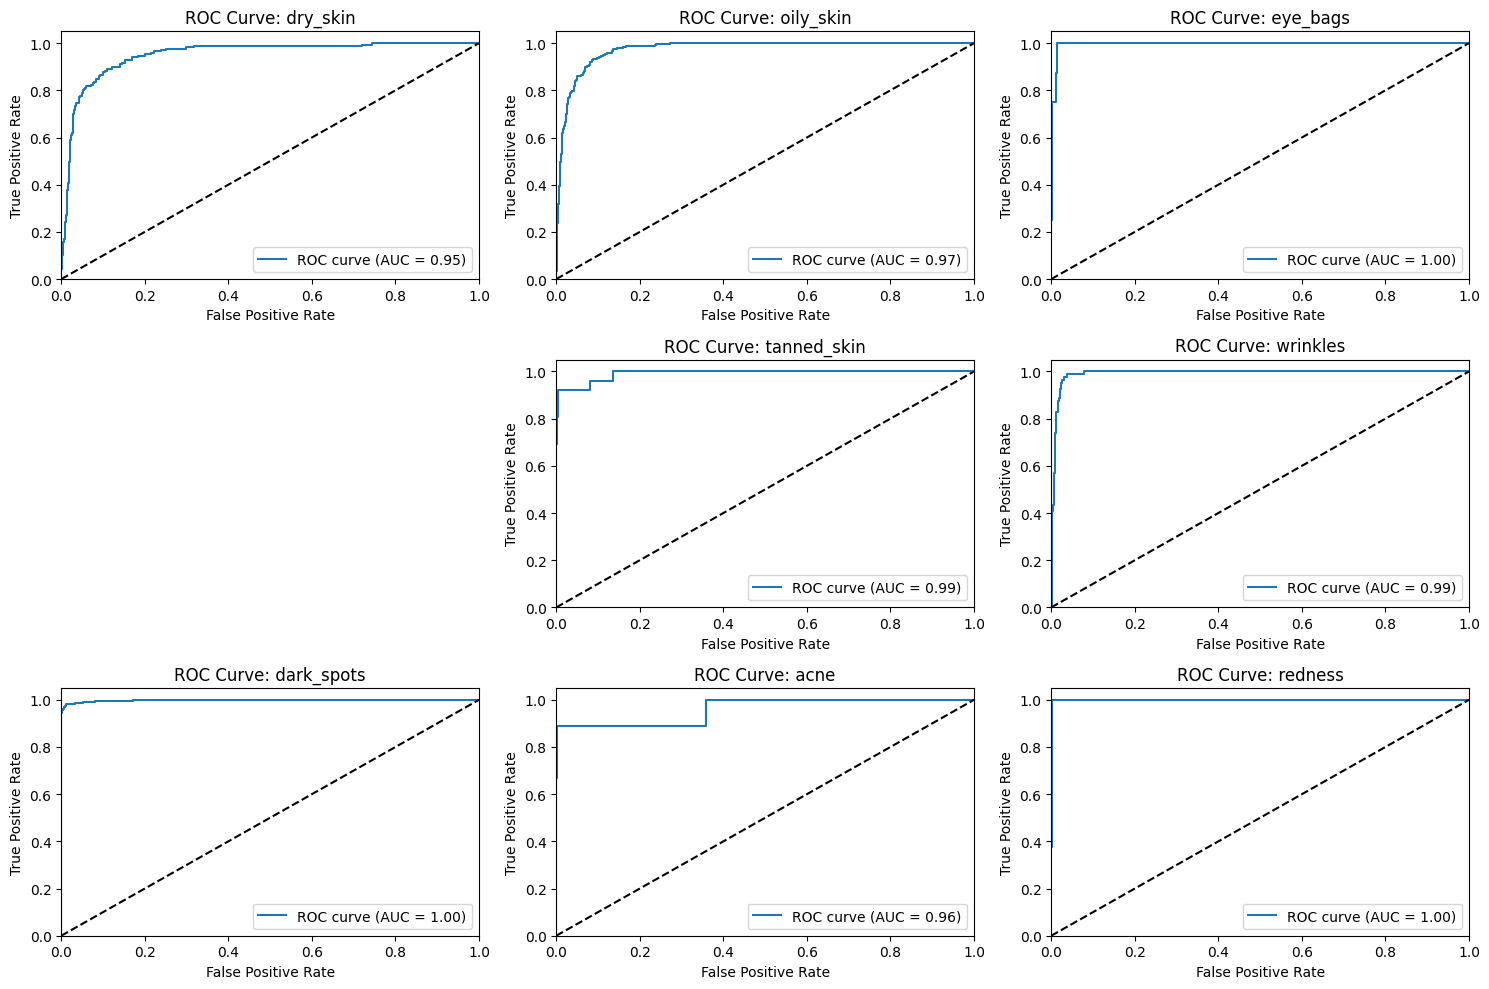

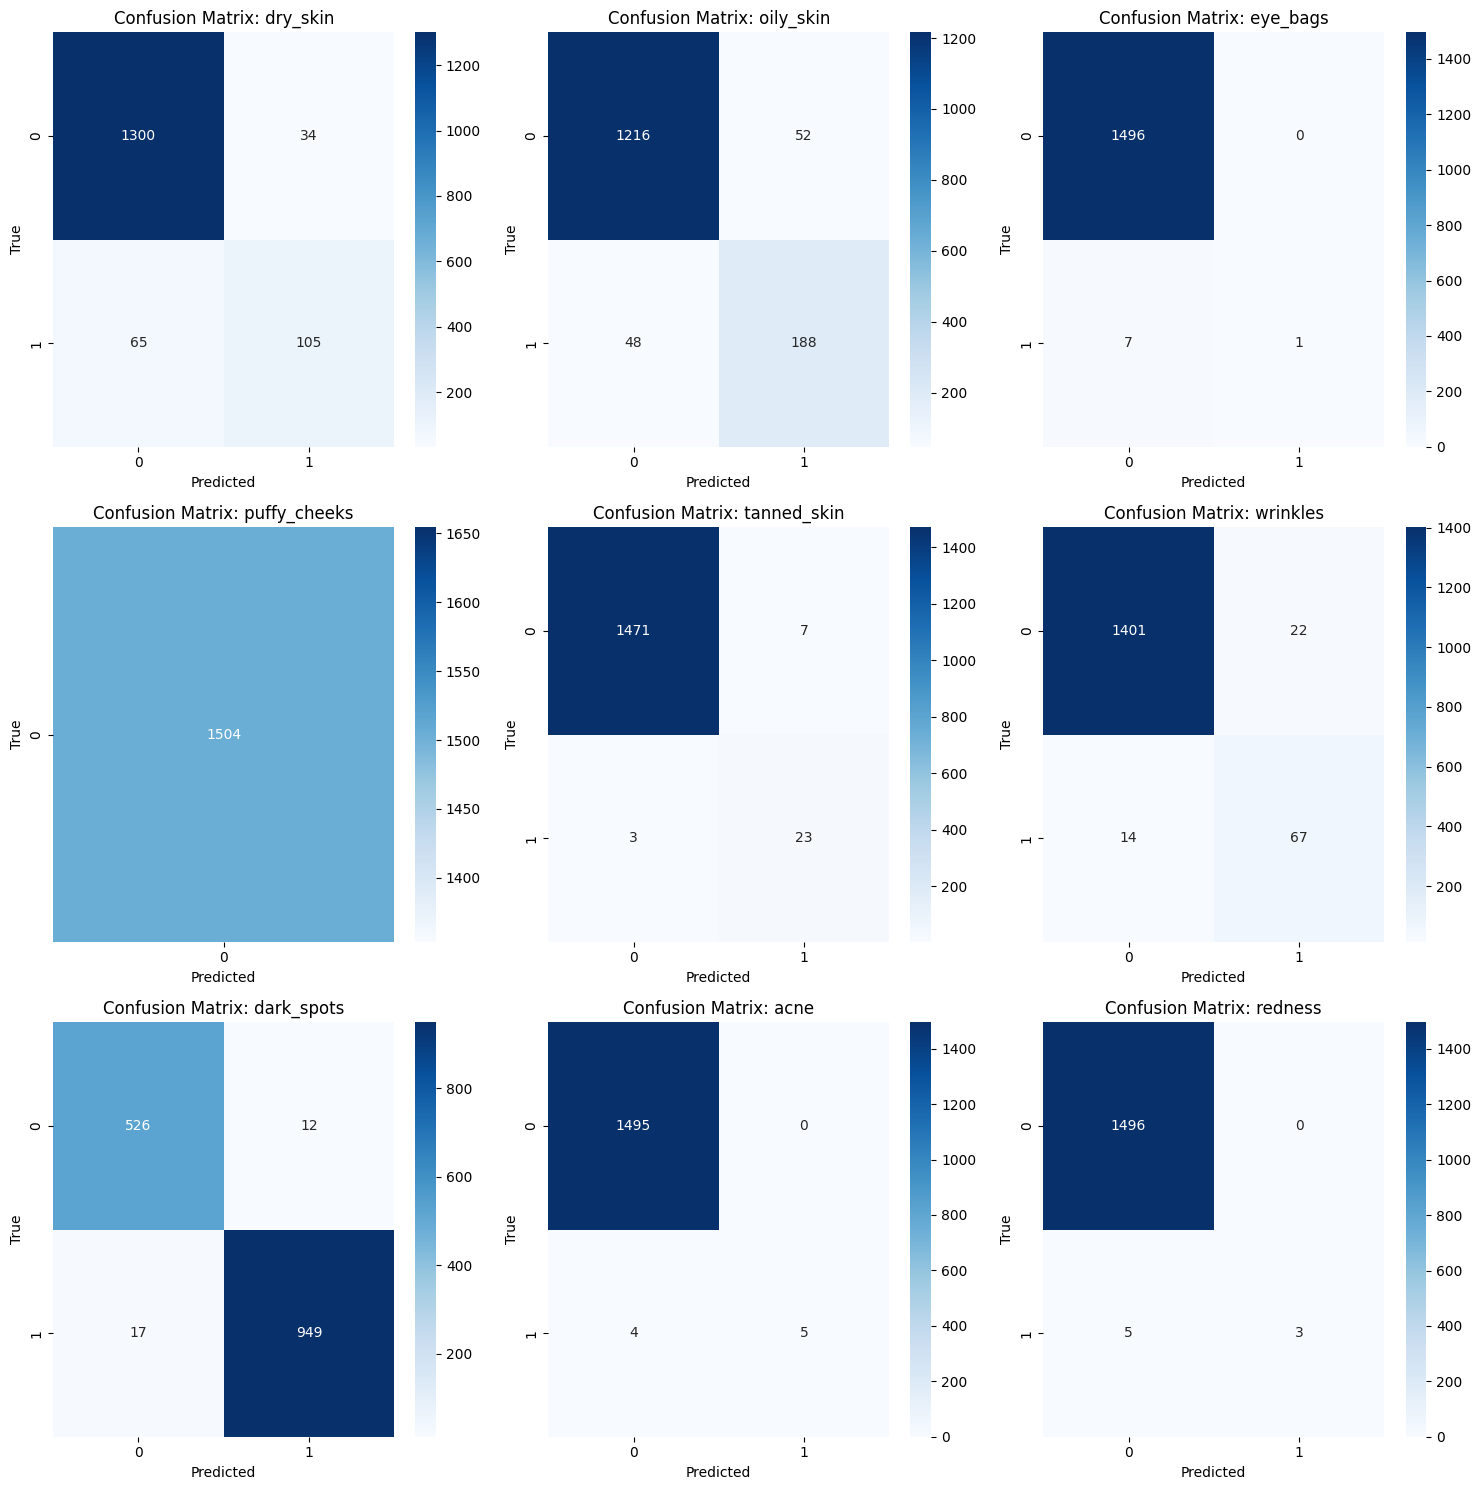


Per-Label Metrics:
dry_skin:
  Precision: 0.7554
  Recall: 0.6176
  F1-Score: 0.6796
  ROC-AUC: 0.9512
oily_skin:
  Precision: 0.7833
  Recall: 0.7966
  F1-Score: 0.7899
  ROC-AUC: 0.9737
eye_bags:
  Precision: 1.0000
  Recall: 0.1250
  F1-Score: 0.2222
  ROC-AUC: 0.9963
puffy_cheeks:
  Precision: 0.0000
  Recall: 0.0000
  F1-Score: 0.0000
  ROC-AUC: Undefined (single class)
tanned_skin:
  Precision: 0.7667
  Recall: 0.8846
  F1-Score: 0.8214
  ROC-AUC: 0.9910
wrinkles:
  Precision: 0.7528
  Recall: 0.8272
  F1-Score: 0.7882
  ROC-AUC: 0.9913
dark_spots:
  Precision: 0.9875
  Recall: 0.9824
  F1-Score: 0.9850
  ROC-AUC: 0.9983
acne:
  Precision: 1.0000
  Recall: 0.5556
  F1-Score: 0.7143
  ROC-AUC: 0.9595
redness:
  Precision: 1.0000
  Recall: 0.3750
  F1-Score: 0.5455
  ROC-AUC: 0.9988

Micro-Averaged Metrics:
Micro Precision: 0.9135
Micro Recall: 0.8916
Micro F1-Score: 0.9024
Micro ROC-AUC: 0.9941

Macro-Averaged Metrics:
Macro Precision: 0.7829
Macro Recall: 0.5738
Macro F1-Score: 

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np
import ast
import os
from sklearn.metrics import precision_score, recall_score, f1_score, hamming_loss, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training and test datasets from CSV files
train_df = pd.read_csv('/kaggle/working/train_dataset.csv')
test_df = pd.read_csv('/kaggle/working/test_dataset.csv')

# Parse the 'labels' column from string representation to dictionary
train_df['labels'] = train_df['labels'].apply(ast.literal_eval)
test_df['labels'] = test_df['labels'].apply(ast.literal_eval)

# Define the list of features matching the dataset preparation
features = ['dry_skin', 'oily_skin', 'eye_bags', 'puffy_cheeks', 'tanned_skin', 'wrinkles', 'dark_spots', 'acne', 'redness']

# Convert label dictionaries to numpy arrays for training
train_labels = np.array([[x[f] for f in features] for x in train_df['labels']], dtype=np.float32)
test_labels = np.array([[x[f] for f in features] for x in test_df['labels']], dtype=np.float32)

# Debugging: Verify that all files in train_df and test_df exist
print("\nChecking training dataset files:")
missing_train_files = [path for path in train_df['image_path'] if not os.path.exists(path)]
if missing_train_files:
    print(f"Warning: {len(missing_train_files)} files are missing in train_df.")
    print("Examples of missing files:")
    for path in missing_train_files[:5]:
        print(f"File does not exist: {path}")
else:
    print("All files in train_df exist.")

print("\nChecking test dataset files:")
missing_test_files = [path for path in test_df['image_path'] if not os.path.exists(path)]
if missing_test_files:
    print(f"Warning: {len(missing_test_files)} files are missing in test_df.")
    print("Examples of missing files:")
    for path in missing_test_files[:5]:
        print(f"File does not exist: {path}")
else:
    print("All files in test_df exist.")

# Define image dimensions and batch size
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Function to load and preprocess images
def load_and_preprocess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image, label

# Function to apply data augmentation to training images
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)
    return image, label

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_df['image_path'].values, train_labels))
train_dataset = train_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=len(train_df)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((test_df['image_path'].values, test_labels))
test_dataset = test_dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Test loading a batch to confirm dataset integrity
print("\nTesting train_dataset batch loading:")
for image_batch, label_batch in train_dataset.take(1):
    print(f"Batch loaded successfully: Images shape: {image_batch.shape}, Labels shape: {label_batch.shape}")

# Build the CNN model
model = models.Sequential([
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='sigmoid')
])

# Compile the model with binary cross-entropy loss and additional metrics
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='binary_accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# Display the model architecture
model.summary()

# Train the model
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset
)

# Evaluate the model with detailed metrics
print("\nEvaluating model on test set...")

# Get predictions for the test set
test_predictions = model.predict(test_dataset)
threshold = 0.5  # Default threshold for binary classification
test_pred_labels = (test_predictions >= threshold).astype(int)

# Plot ROC curves
plt.figure(figsize=(15, 10))
for i, label in enumerate(features):
    # Check if both classes are present
    if len(np.unique(test_labels[:, i])) > 1:
        fpr, tpr, _ = roc_curve(test_labels[:, i], test_predictions[:, i])
        roc_auc = roc_auc_score(test_labels[:, i], test_predictions[:, i])
        plt.subplot(3, 3, i + 1)
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve: {label}')
        plt.legend(loc="lower right")
    else:
        print(f"Skipping ROC curve for {label}: Only one class present in test set.")
plt.tight_layout()
plt.savefig('/kaggle/working/roc_curves.png')
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()
for i, label in enumerate(features):
    cm = confusion_matrix(test_labels[:, i], test_pred_labels[:, i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')
plt.tight_layout()
plt.savefig('/kaggle/working/confusion_matrices.png')
plt.show()

# Compute per-label metrics
print("\nPer-Label Metrics:")
for i, label in enumerate(features):
    precision = precision_score(test_labels[:, i], test_pred_labels[:, i], zero_division=0)
    recall = recall_score(test_labels[:, i], test_pred_labels[:, i], zero_division=0)
    f1 = f1_score(test_labels[:, i], test_pred_labels[:, i], zero_division=0)
    roc_auc = roc_auc_score(test_labels[:, i], test_predictions[:, i]) if len(np.unique(test_labels[:, i])) > 1 else float('nan')
    print(f"{label}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}" if not np.isnan(roc_auc) else "  ROC-AUC: Undefined (single class)")

# Compute micro-averaged metrics
micro_precision = precision_score(test_labels, test_pred_labels, average='micro', zero_division=0)
micro_recall = recall_score(test_labels, test_pred_labels, average='micro', zero_division=0)
micro_f1 = f1_score(test_labels, test_pred_labels, average='micro', zero_division=0)
micro_roc_auc = roc_auc_score(test_labels, test_predictions, average='micro')

print("\nMicro-Averaged Metrics:")
print(f"Micro Precision: {micro_precision:.4f}")
print(f"Micro Recall: {micro_recall:.4f}")
print(f"Micro F1-Score: {micro_f1:.4f}")
print(f"Micro ROC-AUC: {micro_roc_auc:.4f}")

# Compute macro-averaged metrics
macro_precision = precision_score(test_labels, test_pred_labels, average='macro', zero_division=0)
macro_recall = recall_score(test_labels, test_pred_labels, average='macro', zero_division=0)
macro_f1 = f1_score(test_labels, test_pred_labels, average='macro', zero_division=0)
# For macro ROC-AUC, average only over labels with both classes
valid_roc_aucs = [roc_auc_score(test_labels[:, i], test_predictions[:, i]) for i in range(len(features)) if len(np.unique(test_labels[:, i])) > 1]
macro_roc_auc = np.mean(valid_roc_aucs) if valid_roc_aucs else float('nan')

print("\nMacro-Averaged Metrics:")
print(f"Macro Precision: {macro_precision:.4f}")
print(f"Macro Recall: {macro_recall:.4f}")
print(f"Macro F1-Score: {macro_f1:.4f}")
print(f"Macro ROC-AUC: {macro_roc_auc:.4f}" if not np.isnan(macro_roc_auc) else "Macro ROC-AUC: Undefined (insufficient valid labels)")

# Compute Hamming Loss
hamming = hamming_loss(test_labels, test_pred_labels)
print(f"\nHamming Loss: {hamming:.4f}")

# Final evaluation with Keras metrics
test_loss, test_binary_accuracy, test_precision, test_recall = model.evaluate(test_dataset)
print(f"\nKeras Metrics on Test Set:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Binary Accuracy: {test_binary_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")